# Video Processing: Division of Three Interest Areas
This note shows how do we divide the whole camera space into Three Interest Areas, then estimate occupancy in each area using [Openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose).

Three Interest Areas:
1. Whole Interest Area
2. Core Interest Area
3. Margin Interest Area

Load a short clip of video 'test_video.mp4' from Camera1 in ROM.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2
camera = cv2.VideoCapture('test_video.mp4')
total_frame_number = camera.get(cv2.CAP_PROP_FRAME_COUNT)
print('Total # of frame:{}'.format(total_frame_number))

Total # of frame:1428.0


### Whole Interest Area
#### Crop Original Frame

In [2]:
(grabbed, frame) = camera.read()
# Set up crop border
original_h, original_w, channels= frame.shape
print('original_h:{}, original_w:{}, channels:{}'.format(original_h, original_w, channels))
top_edge = int(original_h*(1/10))
down_edge = int(original_h*1)
left_edge = int(original_w*(1/5))
right_edge = int(original_w*(4/5))
print('Crop boundaies:')
print('    top_edge:{}, down_edge:{}, left_edge:{}, right_edge:{}'.format(top_edge, down_edge, left_edge, right_edge))

original_h:1080, original_w:1920, channels:3
Crop boundaies:
    top_edge:108, down_edge:1080, left_edge:384, right_edge:1536


In [3]:
frame_cropped = frame[top_edge:down_edge,left_edge:right_edge,:].copy() # must use copy(), otherwise slice only return address i.e. not hard copy

<IPython.core.display.Javascript object>


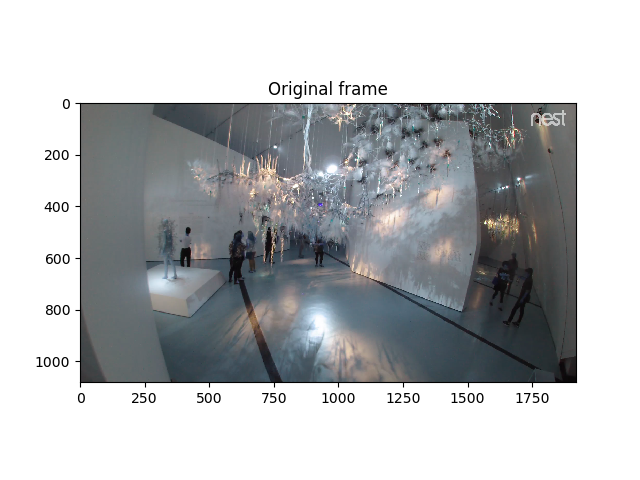

<IPython.core.display.Javascript object>


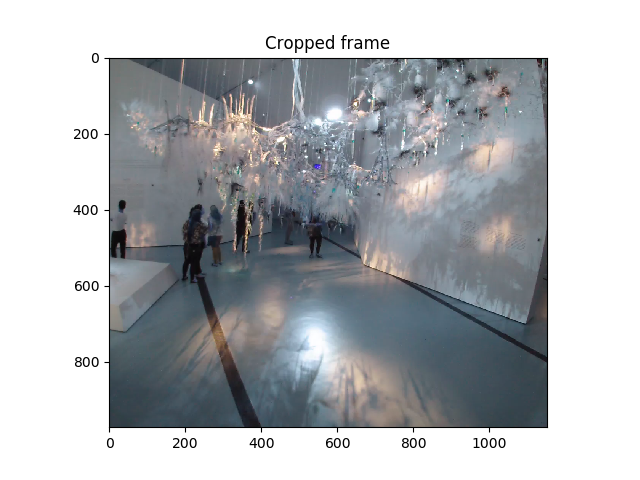

Text(0.5,1,'Cropped frame')

In [4]:
plt.figure()
plt.imshow(frame)
plt.title('Original frame')

plt.figure()
plt.imshow(frame_cropped)
plt.title('Cropped frame')

In [5]:
cropped_h, cropped_w, channels = frame_cropped.shape
print('cropped_h:{}, cropped_w:{}, channels:{}'.format(cropped_h, cropped_w, channels))

cropped_h:972, cropped_w:1152, channels:3


### Define the Boundary Between Core Interest Area and Margin Interest Area

In [6]:
point_1 = [int(0.17 * cropped_w), int(0.20 * cropped_h)]
point_2 = [int(0.17 * cropped_w), int(0.62 * cropped_h)]
point_3 = [int(0.44 * cropped_w), int(0.82 * cropped_h)]
point_4 = [int(0.61 * cropped_w), int(0.72 * cropped_h)]
point_5 = [int(0.61 * cropped_w), int(0.20 * cropped_h)]
print('point_1:{}, point_2: {}, point_3: {}, point_4: {}, point_5: {}'.format(point_1,point_2,point_3,point_4,point_5))
core_interest_area_polygon = np.array([point_1,point_2,point_3,point_4,point_5])

point_1:[195, 194], point_2: [195, 602], point_3: [506, 797], point_4: [702, 699], point_5: [702, 194]


The yellow box is the boundary between **Core Interest Area** and **Margin Interest Area**.

<IPython.core.display.Javascript object>


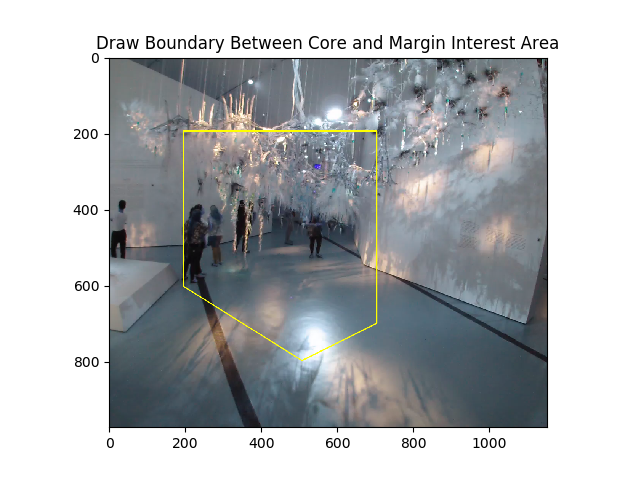

Text(0.5,1,'Draw Boundary Between Core and Margin Interest Area')

In [7]:
# Show the bounday between core interest are and margin interest area
frame_cropped_copy = frame_cropped
cv2.drawContours(frame_cropped_copy, [core_interest_area_polygon], -1, (255, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(frame_cropped_copy)
plt.title('Draw Boundary Between Core and Margin Interest Area')

### Core Interest Area
**Core Interest Area** is the space underneath the Canopy where we assume visitors is directly interacting with the Living Architecture System.

<IPython.core.display.Javascript object>


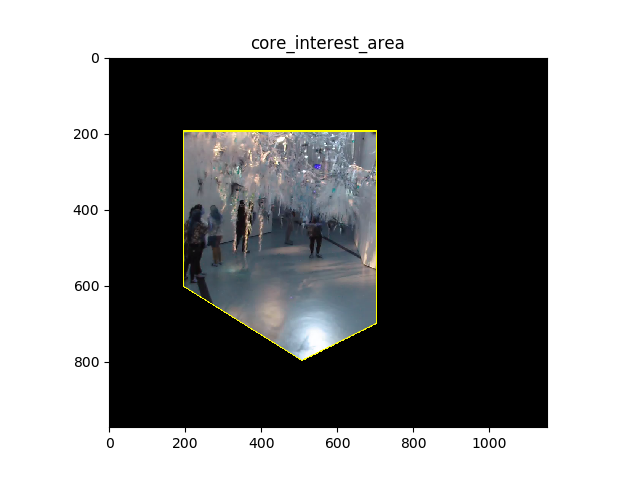

Text(0.5,1,'core_interest_area')

In [8]:
core_interest_area_mask = np.zeros(frame_cropped.shape[:2], np.uint8)
cv2.drawContours(core_interest_area_mask, [core_interest_area_polygon], -1, (255, 255, 255), -1, cv2.LINE_AA)

core_interest_area = cv2.bitwise_and(frame_cropped, frame_cropped, mask=core_interest_area_mask)

plt.figure()
plt.imshow(core_interest_area)
plt.title('core_interest_area')

### Margin Interst Area
**Margin Interest Area** is the area surround Canopy, but not far from Canopy. This is the area where we assume visitors are appreciating the architecture and will very probably be attracted to go to interact with the architure.

<IPython.core.display.Javascript object>


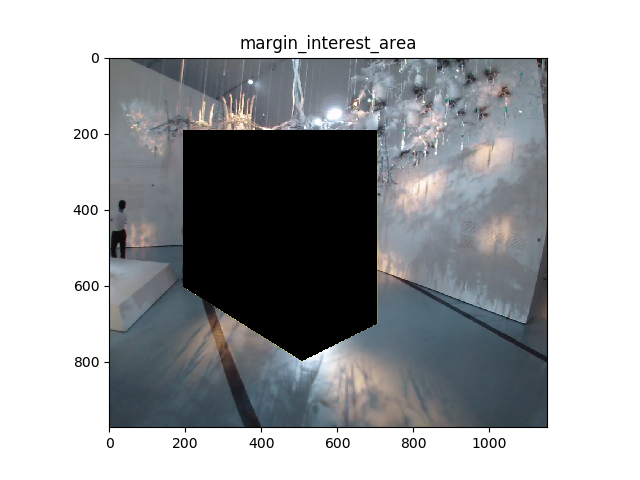

Text(0.5,1,'margin_interest_area')

In [9]:
margin_interest_area = cv2.bitwise_xor(frame_cropped, core_interest_area)
plt.figure()
plt.imshow(margin_interest_area)
plt.title('margin_interest_area')